In [62]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

In [4]:
data = pd.read_csv('SoleaTimeSeriesDataset-Temperature-Salinity.csv')
data['year_month'] = pd.to_datetime(data['year_month'])
data['year'] = data['year_month'].dt.year
data['month'] = data['year_month'].dt.month
data.head()

,id,obs_id,year_month,temperatureSurface,temperature100_300,temperature300_400,temperature100_500,temperatureMaxDepth,salinitySurface,salinity100_300,salinity300_400,salinity100_500,salinityMaxDepth,year,month
0,02008-01,0,2008-01-01,15.713940,13.886082,13.886082,13.088567,12.823628,37.147140,38.262170,38.262170,38.560493,38.584150,2008,1
1,02008-02,0,2008-02-01,14.792473,13.868667,13.868667,13.081740,12.822814,37.084457,38.264230,38.264230,38.563950,38.584694,2008,2
2,02008-03,0,2008-03-01,14.733397,13.963535,13.963535,13.082810,12.824340,36.935814,38.210846,38.210846,38.561314,38.586860,2008,3
3,02008-04,0,2008-04-01,15.850550,13.979778,13.979778,13.139173,12.829004,37.155983,38.196102,38.196102,38.553448,38.589336,2008,4
4,02008-05,0,2008-05-01,18.497694,13.637879,13.637879,13.128523,12.827576,37.341560,38.253180,38.253180,38.548040,38.588478,2008,5


### Time Plot

For time series data, the obvious graph to start with is a time plot. That is, the observations are plotted against the time of observation, with consecutive observations joined by straight lines. 

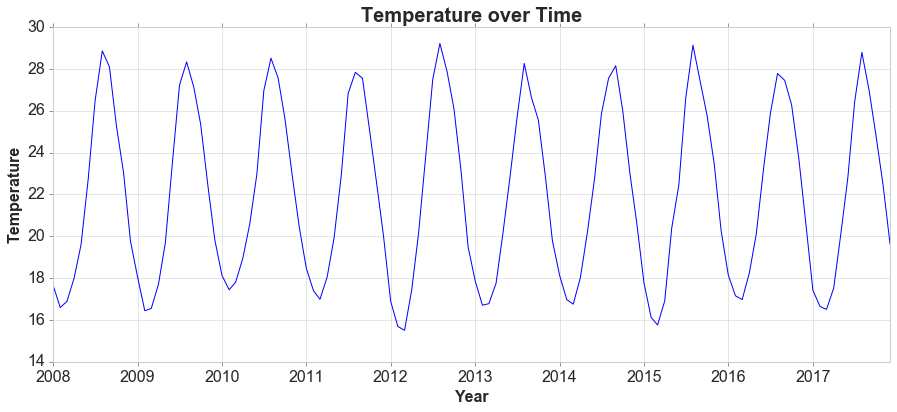

In [5]:
fig, ax = plt.subplots(figsize=(15, 6))
d = data[data['obs_id']==2]
sns.lineplot(d['year_month'], d['temperatureSurface'] )

ax.set_title('Temperature over Time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Temperature', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
ax.yaxis.tick_left() # where the y axis marks will be

The monthly data show strong seasonality within each year. There is no cyclic behavior and no trend.

### Seasonal Plot and Box Plots

A seasonal plot is similar to a time plot except that the data are plotted against the individual “seasons” in which the data were observed. 

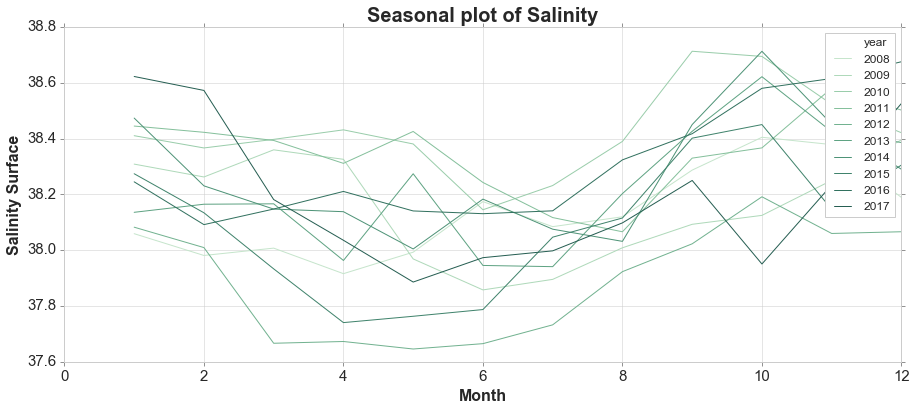

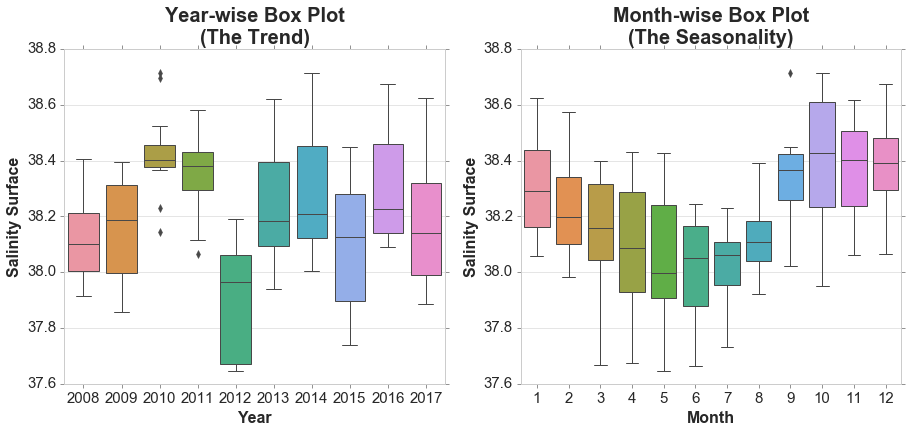

In [6]:
variable = 'salinitySurface'
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
sns.lineplot(d['month'], d[variable], hue=d['year'], palette=palette)
ax.set_title('Seasonal plot of Salinity', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Salinity Surface', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(d['year'], d[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Salinity Surface', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(d['month'], d[variable], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Salinity Surface', fontsize = 16, fontdict=dict(weight='bold'))

### Decomposition

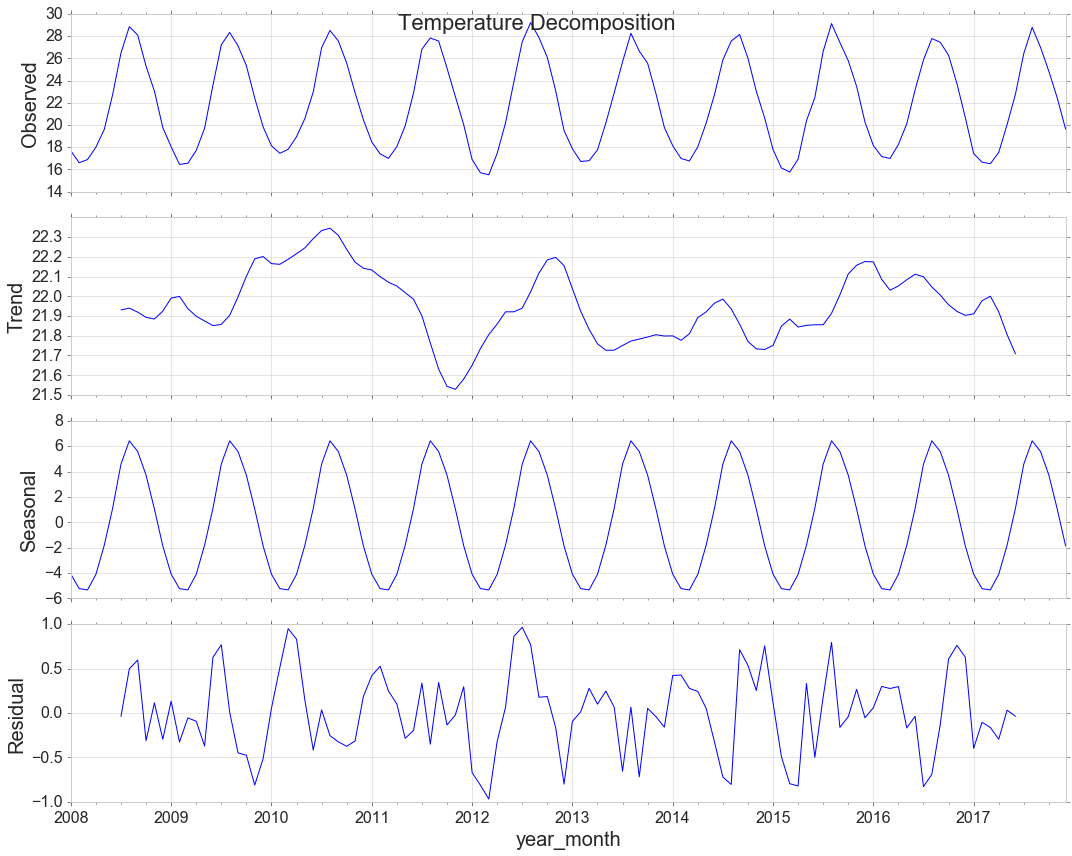

In [7]:
y = data[data['obs_id']==2][['year_month','temperatureSurface']]
y = y.set_index('year_month')

from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 20
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 16
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomp = decomposition.plot()
decomp.suptitle('Temperature Decomposition', fontsize=22)

### Measure the strength of trend. 0 for low, 1 for high

In [50]:
max(0,(1-decomposition.resid.var()/(decomposition.resid+decomposition.trend).var())[0])

0.10248782084731933

### Measure the strength of seasonality

In [51]:
max(0,(1-decomposition.resid.var()/(decomposition.resid+decomposition.seasonal).var())[0])

0.9880830435213952

### Detrend

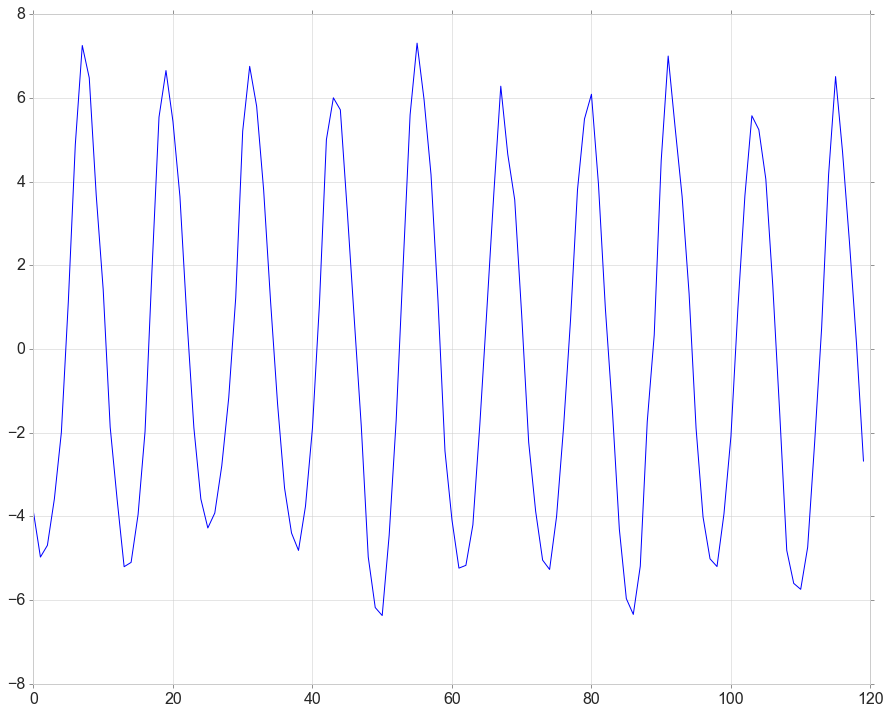

In [8]:
detrended = signal.detrend(data[data['obs_id']==2][['year_month','temperatureSurface']]['temperatureSurface'].values)
plt.plot(detrended)

### Stationarity

In [45]:
# check for stationarity
# ADF Test
result = adfuller(data[data['obs_id']==2][['year_month','temperatureSurface']]['temperatureSurface'].values, autolag='AIC')
print("ADF Statistic: {}".format(result[0]))
print("P-Value: {}".format(result[1]))
for key, value in result[4].items():
    print('Critial Values:')
    print('   {}, {}'.format(key,value))
    
# KPSS Test
result = kpss(data[data['obs_id']==2][['year_month','temperatureSurface']]['temperatureSurface'].values, regression='c')
print("\nKPSS Statistic: {}".format(result[0]))
print("P-Value: {}".format(result[1]))
for key, value in result[3].items():
    print('Critial Values:')
    print("   {}, {}".format(key,value))

ADF Statistic: -2.864219072235504
P-Value: 0.049669853082017885
Critial Values:
   10%, -2.5811201893779985
Critial Values:
   5%, -2.8884437992971588
Critial Values:
   1%, -3.49181775886872

KPSS Statistic: 0.16268094415564427
P-Value: 0.1
Critial Values:
   10%, 0.347
Critial Values:
   1%, 0.739
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574


c:\users\jim\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In the ADF test, the null hypothesis is the time series possesses a unit root and is non-stationary. So because the P-Value is <0.05 we reject the null hypothesis.

The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test.

### Autocorrelation

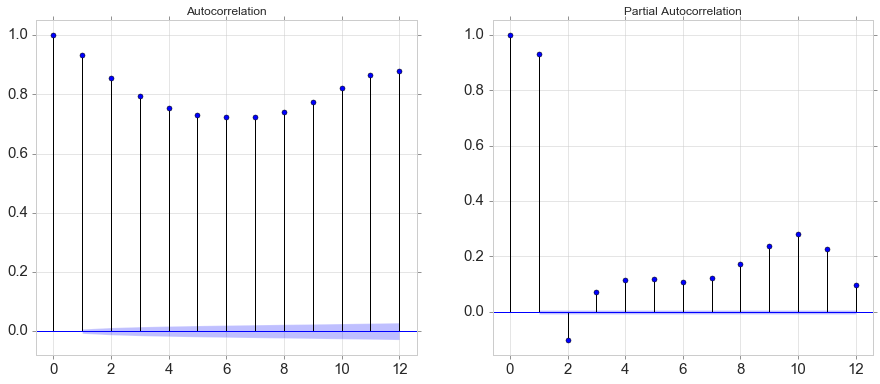

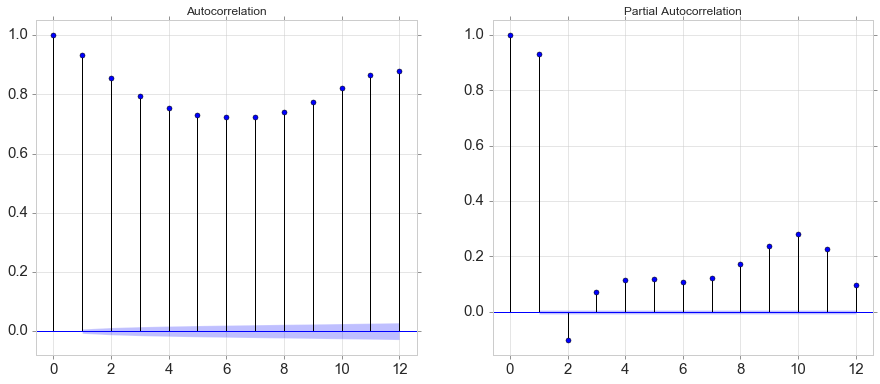

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
#autocorr = acf(data[variable], nlags=12) # just the numbers
plot_acf(data[variable].tolist(), lags=12, ax=ax[0]) # just the plot
plot_pacf(data[variable].tolist(), lags=12, ax=ax[1]) # just the plot

In [59]:
autocorr

array([1.        , 0.9326662 , 0.85668922, 0.79436762, 0.75302265,
       0.73118683, 0.72281034, 0.72513455, 0.74072217, 0.77355728,
       0.82080037, 0.86408744, 0.88016387])

### Simple forecasting methods

#### Average method
Here, the forecasts of all future values are equal to the mean of the historical data.

#### Naïve method
For naïve forecasts, we simply set all forecasts to be the value of the last observation.

#### Seasonal naïve method
In this case, we set each forecast to be equal to the last observed value from the same season of the year.

#### Drift method
A variation on the naïve method is to allow the forecasts to increase or decrease over time, where the amount of change over time (called the drift) is set to be the average change seen in the historical data.